# Task:04 
# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# About DataSet 
 Twitter Sentiment Analysis DataSet

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
cols =['ID', 'Topic', 'Sentiment', 'Text']
df=pd.read_csv(r"C:\Users\KIIT\Desktop\Prodigy infotech\Task 04\twitter_training.csv",names = cols)

In [5]:
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.tail()

,ID,Topic,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
df.shape

(74682, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
df.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [10]:
df['Sentiment'].unique()


array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [11]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [15]:
df.duplicated().sum()

2340

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

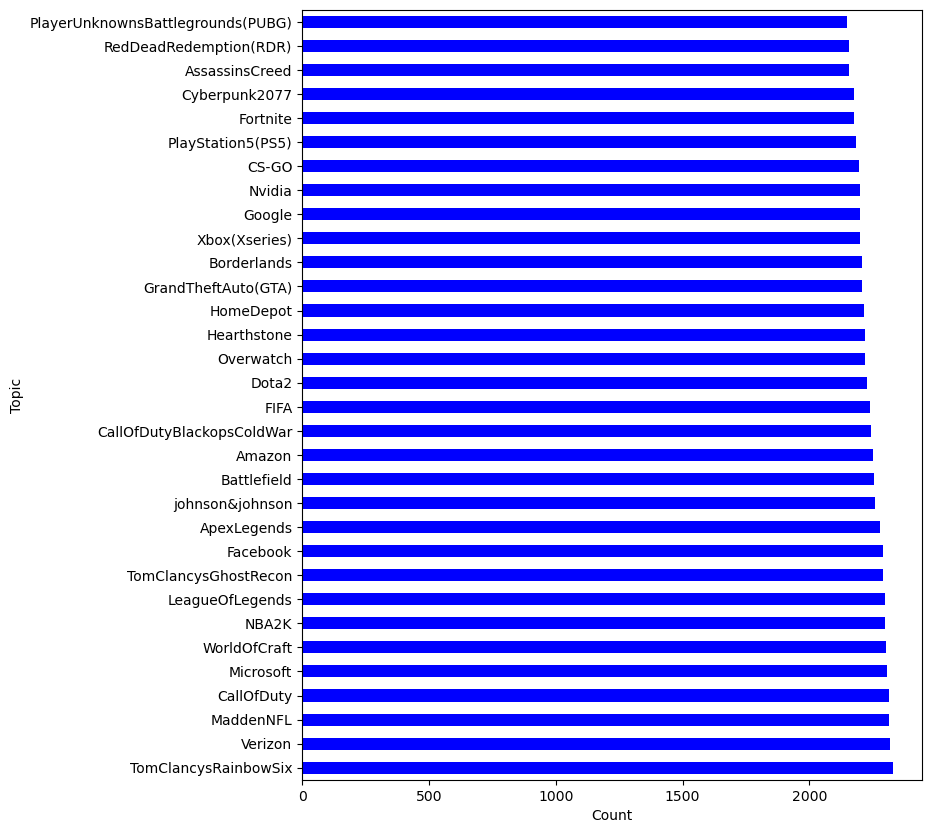

In [19]:
plt.figure(figsize=(8,10))
df['Topic'].value_counts().plot(kind='barh',color='b')
plt.xlabel("Count")
plt.show()

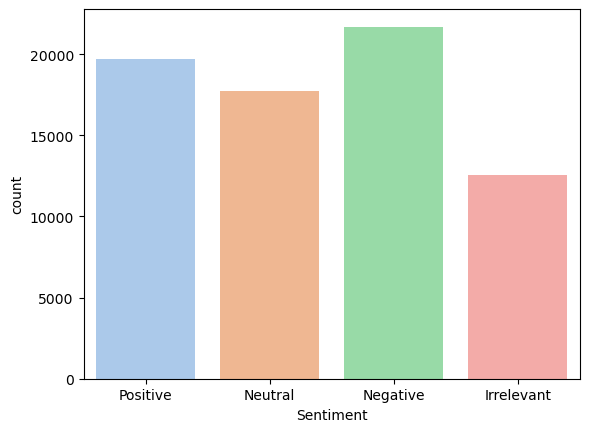

In [20]:
sns.countplot(x = 'Sentiment',data=df,palette='pastel')
plt.show()

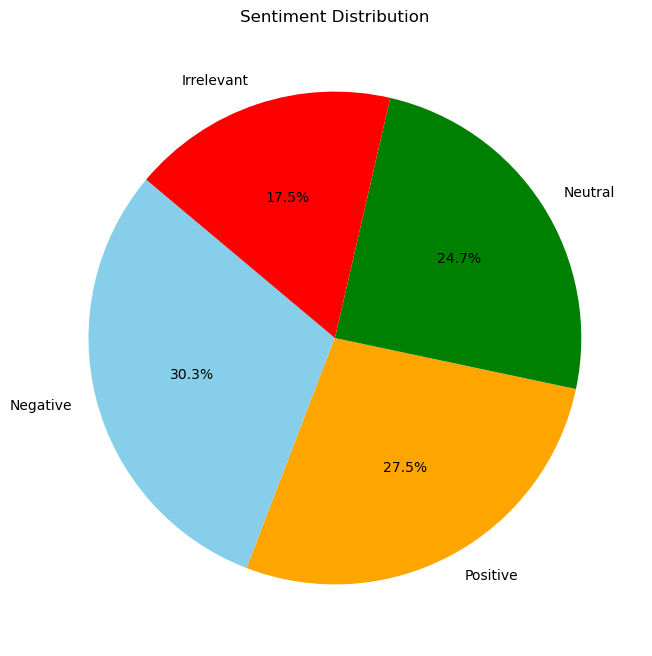

In [21]:
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [22]:
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


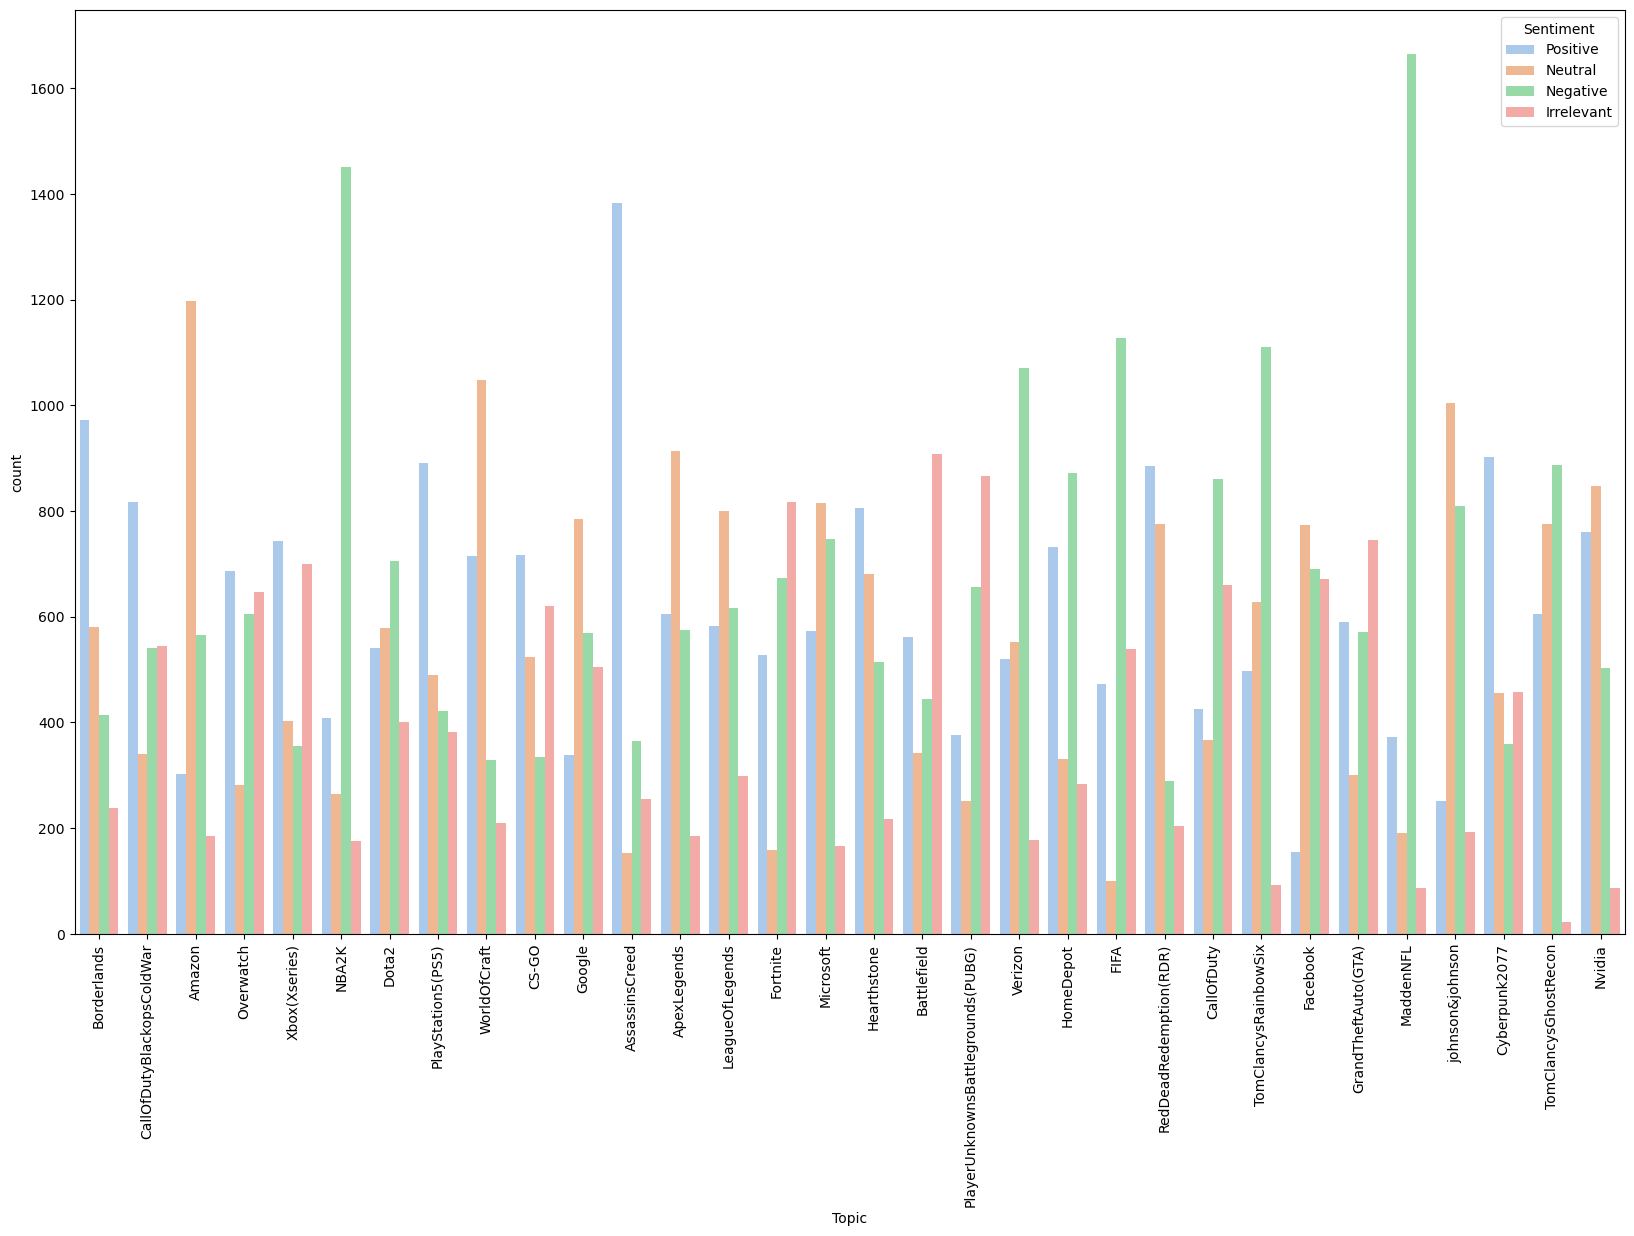

In [23]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=df,palette='pastel',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [24]:
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

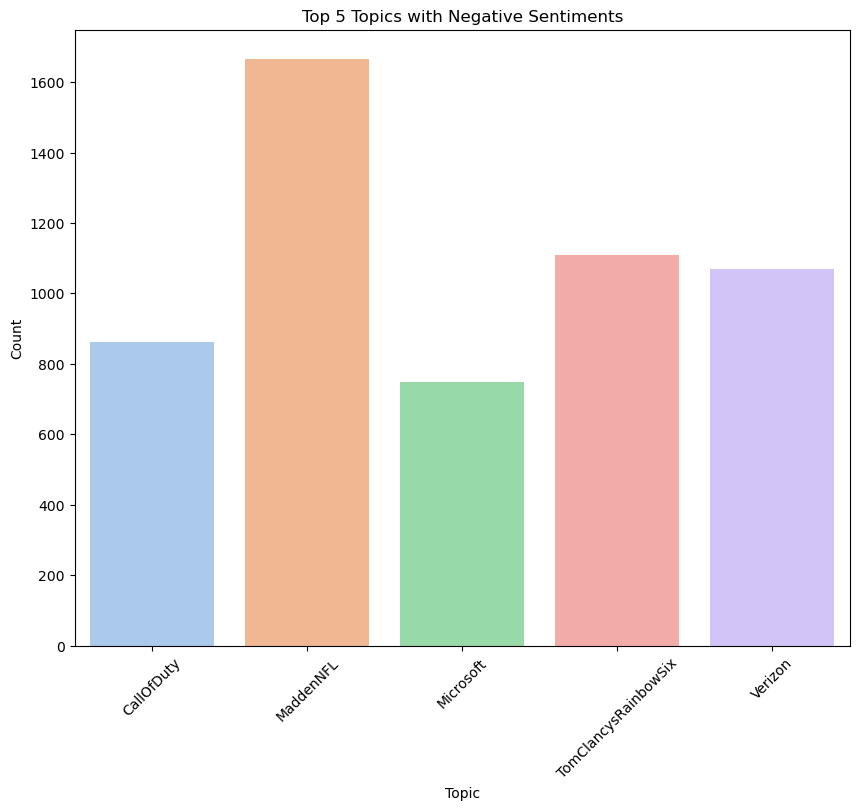

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='pastel')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

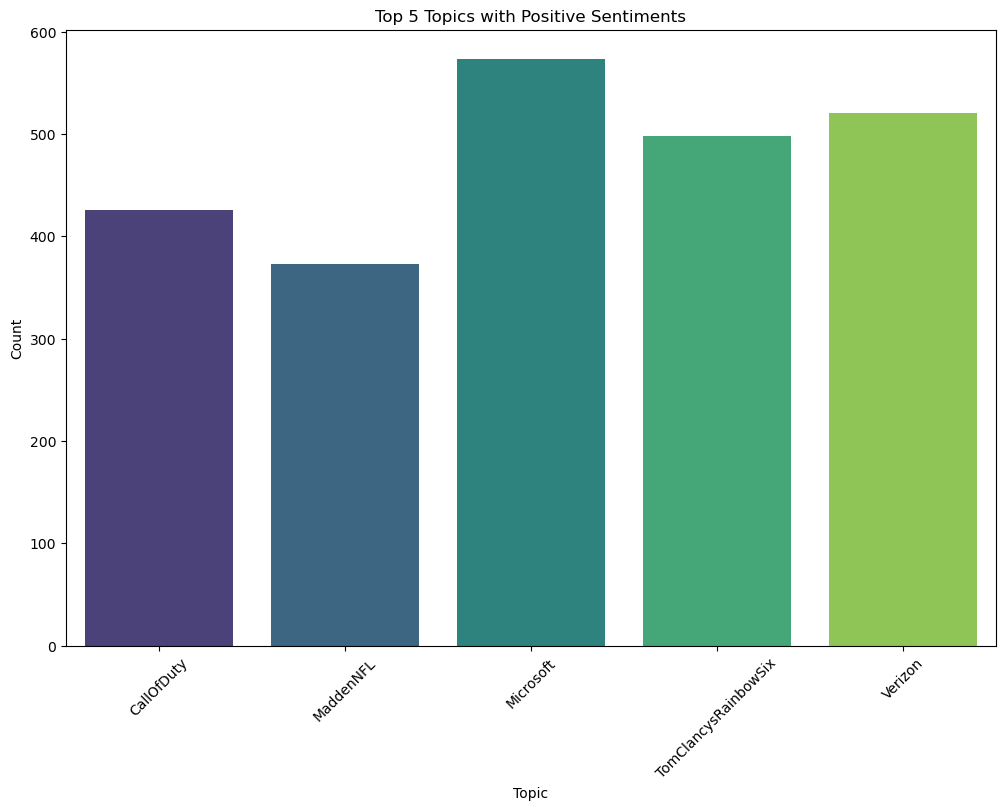

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

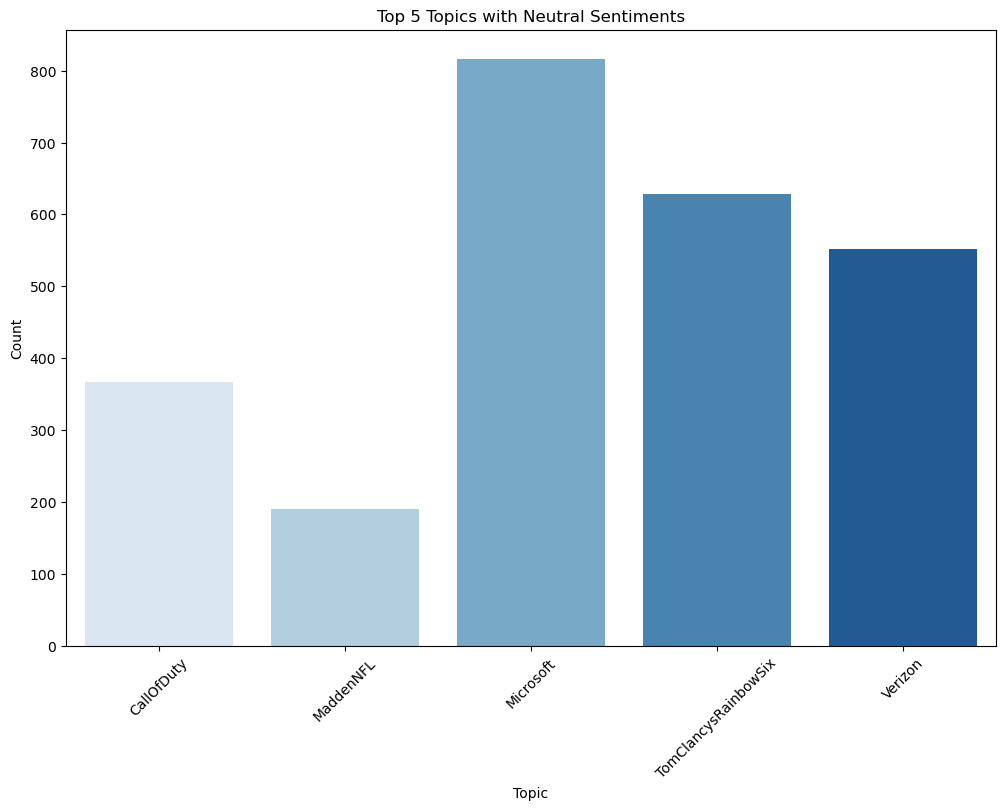

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

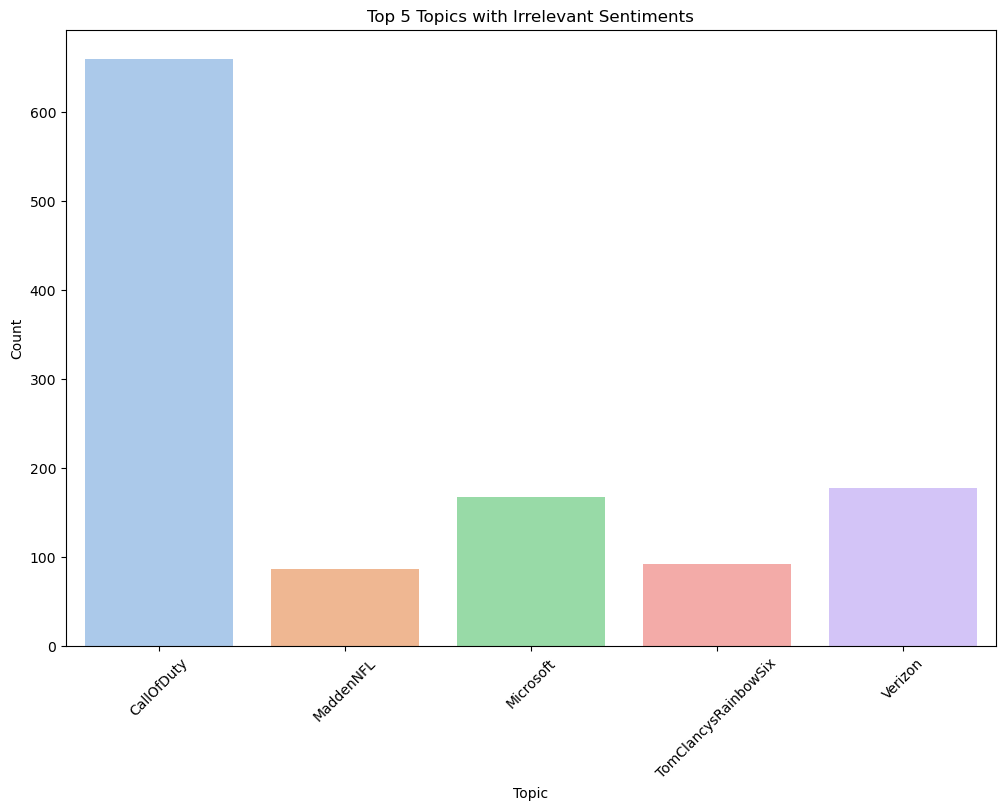

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='pastel')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

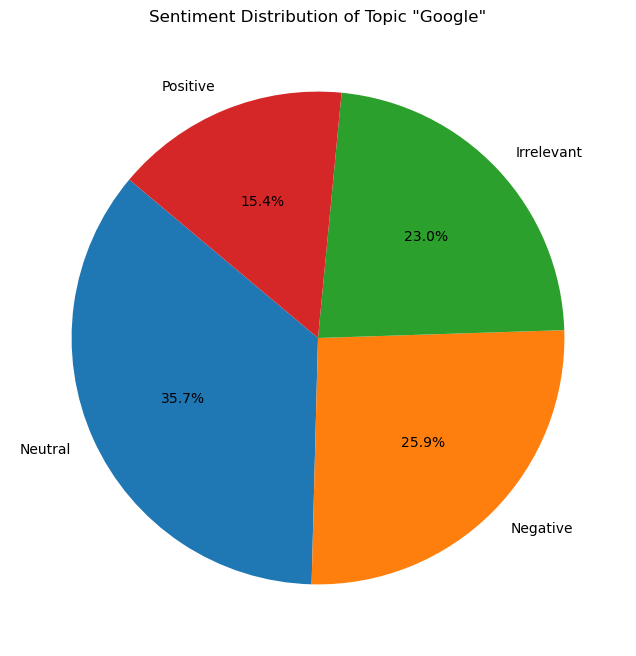

In [31]:
google_data = df[df['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

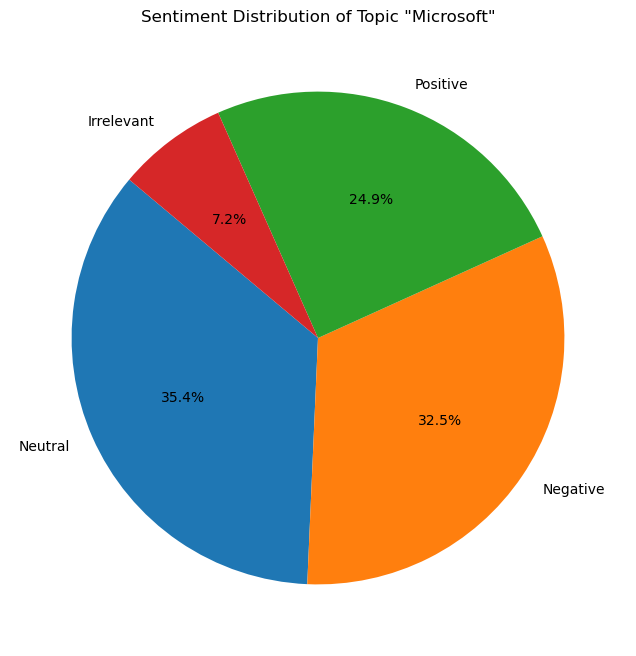

In [32]:
ms_data = df[df['Topic'] == 'Microsoft']
sentiment_counts = ms_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [33]:
df['msg_len'] = df['Text'].apply(len)

In [34]:
df


,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


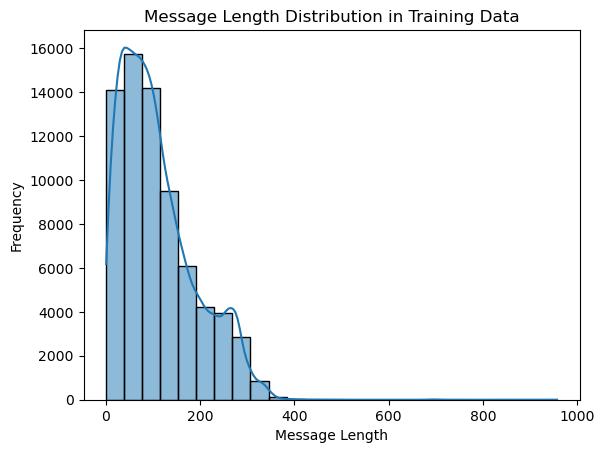

In [36]:
sns.histplot(df['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

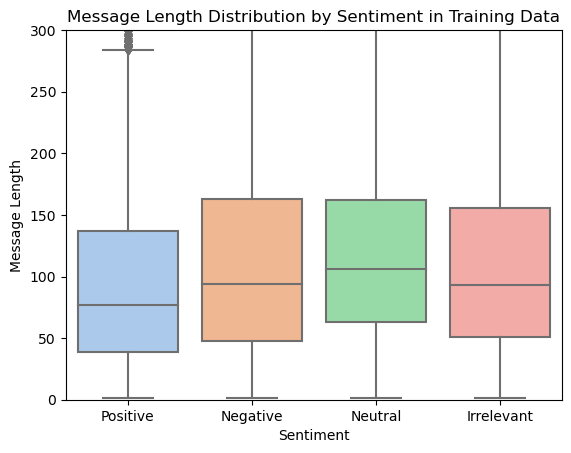

In [39]:
sns.boxplot(data=df, x=df['Sentiment'], y='msg_len', palette='pastel', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()  

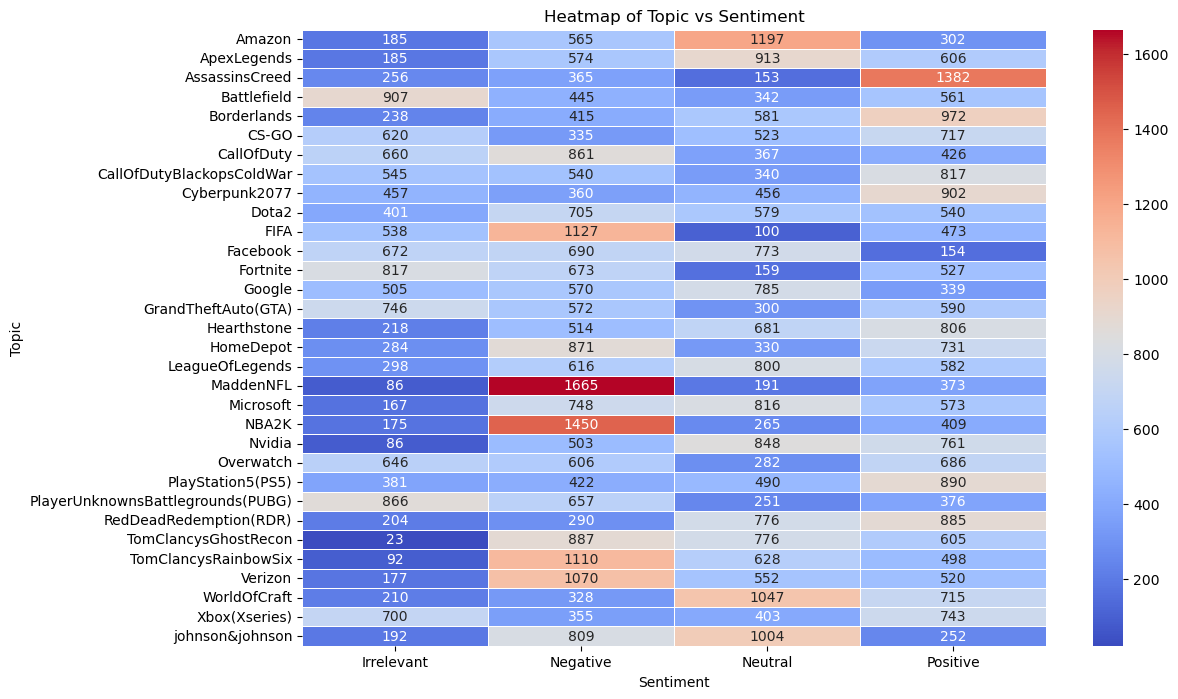

In [40]:
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()